# [TEMPLATE] DATASET DEPURADO

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

/home/nicolas/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [3]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [4]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [5]:
df['anio'] = df['fecha'].dt.year

In [6]:
df['mes'] = df['fecha'].dt.month

In [7]:
df['aux'] = 1

In [9]:
pubs_por_mes_anio = df.pivot_table(index='anio', columns='mes', values='aux', aggfunc='sum')

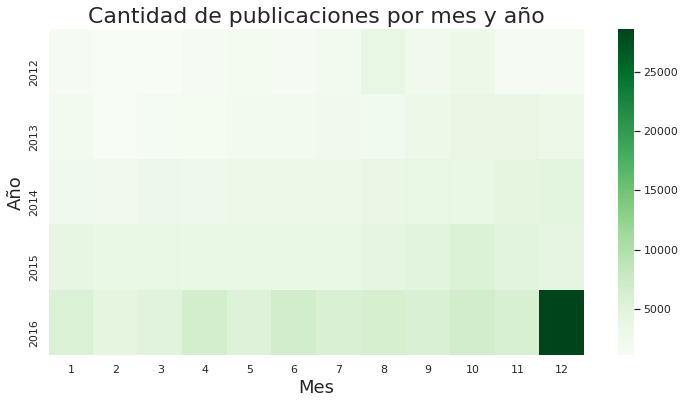

In [32]:
plt.figure(figsize=(12, 6))
g = sns.heatmap(pubs_por_mes_anio, cmap='Greens')
g.set_title("Cantidad de publicaciones por mes y año", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Año", fontsize=18)
g.figure.savefig("Banios segun antiguedad.png", bbox_inches='tight')
g.figure.savefig("heatmap publicaciones por anio.png", bbox_inches='tight')

In [19]:
pubs_por_mes_anio

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2012,1528,1327,1103,1434,1857,1524,1973,3971,2598,3161,1608,1450
2013,1993,1401,1734,1829,2000,2016,2524,2374,3321,4056,4012,3126
2014,2403,2534,2916,2780,3071,3082,3125,3583,3911,3811,4613,4743
2015,4310,3869,3957,3783,3696,3804,3875,4526,4863,5552,4906,4329
2016,5775,4592,5022,6640,5438,6795,6013,6443,5929,6726,6086,28579


# Mismo heatmap que el anterior pero sin 2016

In [26]:
df2 = df.loc[df['anio'] != 2016]

In [28]:
pubs_por_mes_anio_2 = df2.pivot_table(index='anio', columns='mes', values='aux', aggfunc='sum')

In [30]:
pubs_por_mes_anio_2

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2012,1528,1327,1103,1434,1857,1524,1973,3971,2598,3161,1608,1450
2013,1993,1401,1734,1829,2000,2016,2524,2374,3321,4056,4012,3126
2014,2403,2534,2916,2780,3071,3082,3125,3583,3911,3811,4613,4743
2015,4310,3869,3957,3783,3696,3804,3875,4526,4863,5552,4906,4329


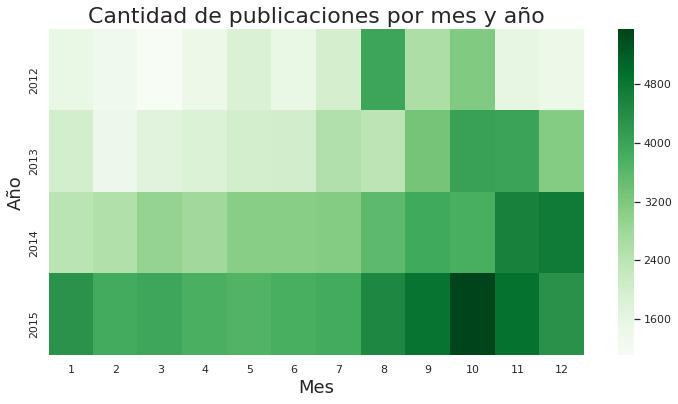

In [33]:
plt.figure(figsize=(12, 6))
g = sns.heatmap(pubs_por_mes_anio_2, cmap='Greens')
g.set_title("Cantidad de publicaciones por mes y año", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Año", fontsize=18)
g.figure.savefig("heatmap publicaciones por anio sin 2016.png", bbox_inches='tight')